In [15]:
#126015039
#KNN Classifier & Regression 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error,accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
import joblib

In [ ]:
data = pd.read_csv(

In [25]:
data = pd.read_csv(r"C:\Users\sastra\Downloads\126015039\dataset\bangalore house price prediction OHE-data.csv", sep = ',')
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df = data.copy()
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.shape

(7120, 108)

In [30]:
column_names = df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft', 'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area', 'area_typePlot  Area', 'availability_Ready To Move', 'location_Whitefield', 'location_Sarjapur  Road', 'location_Electronic City', 'location_Marathahalli', 'location_Raja Rajeshwari Nagar', 'location_Haralur Road', 'location_Hennur Road', 'location_Bannerghatta Road', 'location_Uttarahalli', 'location_Thanisandra', 'location_Electronic City Phase II', 'location_Hebbal', 'location_7th Phase JP Nagar', 'location_Yelahanka', 'location_Kanakpura Road', 'location_KR Puram', 'location_Sarjapur', 'location_Rajaji Nagar', 'location_Kasavanhalli', 'location_Bellandur', 'location_Begur Road', 'location_Banashankari', 'location_Kothanur', 'location_Hormavu', 'location_Harlur', 'location_Akshaya Nagar', 'location_Jakkur', 'location_Electronics City Phase 1', 'location_Varthur', 'location_Chandapura', 'location_HSR Layout', 'location_Hennur', 'location_Ra

In [31]:
df.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [32]:
df1 = df[['bath', 'balcony', 'total_sqft_int', 'bhk']]
df1.head()

,bath,balcony,total_sqft_int,bhk
0,3.0,2.0,1672.0,3
1,3.0,3.0,1750.0,3
2,3.0,2.0,1750.0,3
3,2.0,2.0,1250.0,2
4,2.0,2.0,1200.0,2


In [24]:
print("SUMMARY OF THE DATAFRAME'S STRUCTURE AND CONTENT ")
df1.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath            7120 non-null   float64
 1   balcony         7120 non-null   float64
 2   total_sqft_int  7120 non-null   float64
 3   bhk             7120 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 222.6 KB


In [33]:
df1.describe()

,bath,balcony,total_sqft_int,bhk
count,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,1479.729806,2.465169
std,0.876822,0.770583,913.779769,0.841520
min,1.000000,0.000000,350.000000,1.000000
25%,2.000000,1.000000,1100.000000,2.000000
50%,2.000000,2.000000,1255.000000,2.000000
75%,3.000000,2.000000,1640.250000,3.000000
max,9.000000,3.000000,30400.000000,9.000000


In [34]:
df1.corr()

,bath,balcony,total_sqft_int,bhk
bath,1.000000,0.283192,0.653435,0.882461
balcony,0.283192,1.000000,0.200648,0.269511
total_sqft_int,0.653435,0.200648,1.000000,0.647485
bhk,0.882461,0.269511,0.647485,1.000000


In [36]:
print("THE SKEWNESS OF THE DATASET ")
print(df1.skew())

THE SKEWNESS OF THE DATASET 
bath               1.796257
balcony            0.066610
total_sqft_int    11.464497
bhk                1.605694
dtype: float64


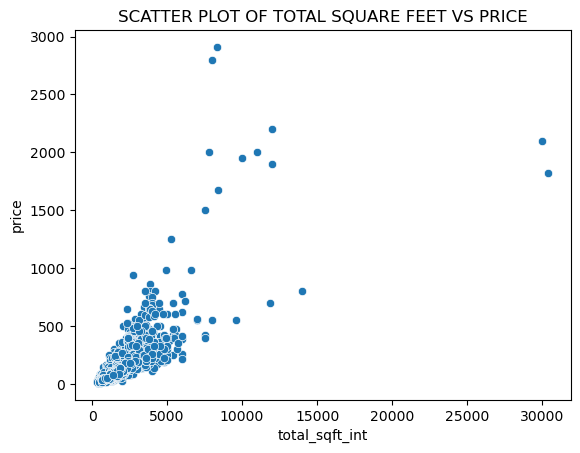

In [37]:
sns.scatterplot(x='total_sqft_int', y='price', data=df)
plt.title('SCATTER PLOT OF TOTAL SQUARE FEET VS PRICE')
plt.savefig('scatter_plot.png')
plt.show()

C:\Users\sastra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sastra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sastra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sastra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

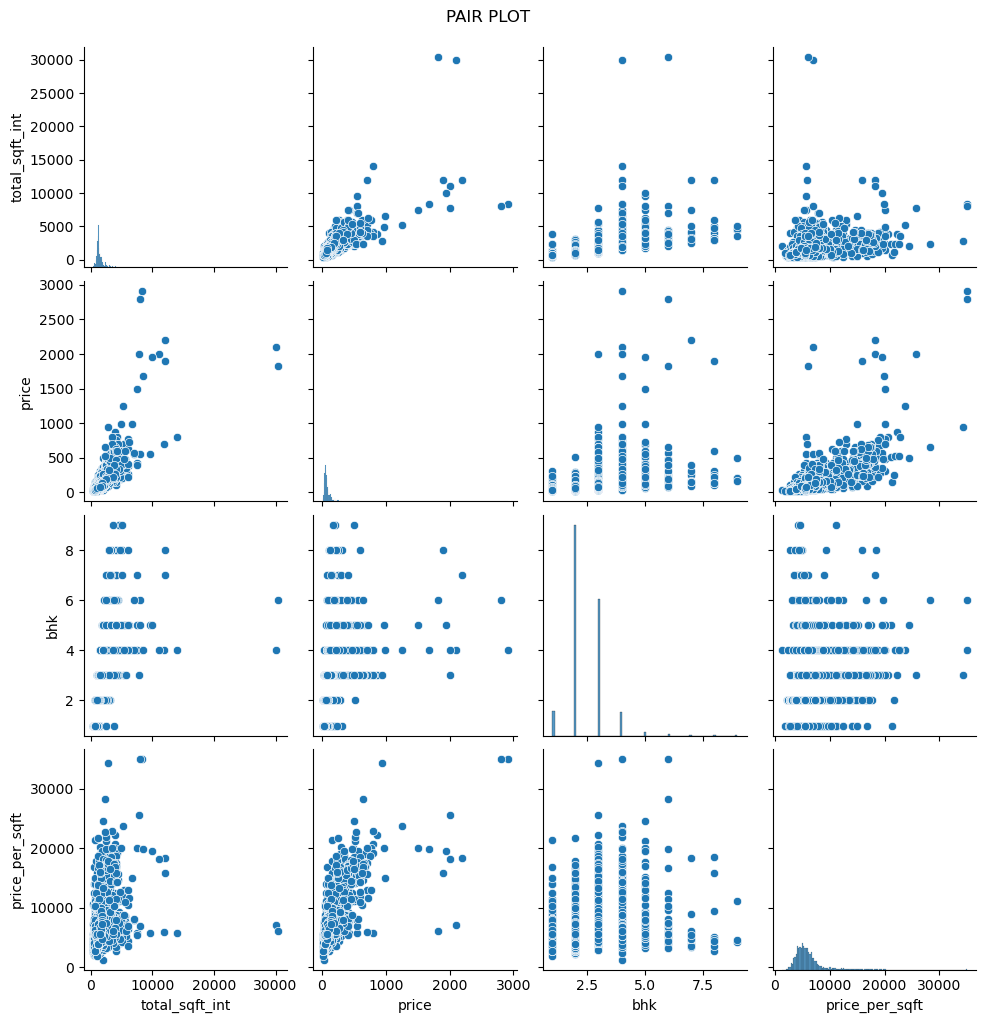

In [40]:

selected_columns = ['total_sqft_int', 'price', 'bhk', 'price_per_sqft']
sns.pairplot(df[selected_columns])
plt.suptitle('PAIR PLOT  ', y=1.02)
plt.savefig('pair_plot.png')
plt.show()


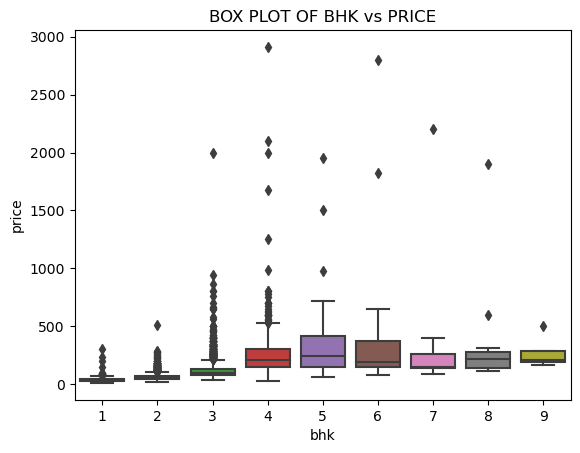

In [41]:

sns.boxplot(x='bhk', y='price', data=df)
plt.title('BOX PLOT OF BHK vs PRICE')
plt.savefig('box_plot.png')
plt.show()


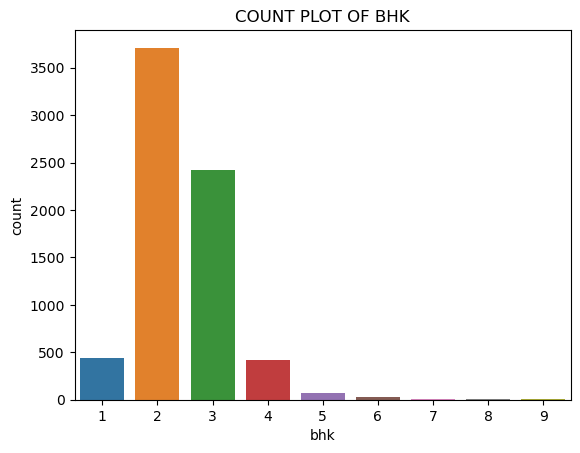

In [42]:

sns.countplot(x='bhk', data=df)
plt.title('COUNT PLOT OF BHK')
plt.savefig('count_plot.png')
plt.show()


In [44]:
X = df[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area', 'area_typePlot  Area', 'availability_Ready To Move', 'location_Whitefield', 'location_Sarjapur  Road', 'location_Electronic City', 'location_Marathahalli', 'location_Raja Rajeshwari Nagar', 'location_Haralur Road', 'location_Hennur Road', 'location_Bannerghatta Road', 'location_Uttarahalli', 'location_Thanisandra', 'location_Electronic City Phase II', 'location_Hebbal', 'location_7th Phase JP Nagar', 'location_Yelahanka', 'location_Kanakpura Road', 'location_KR Puram', 'location_Sarjapur', 'location_Rajaji Nagar', 'location_Kasavanhalli', 'location_Bellandur', 'location_Begur Road', 'location_Banashankari', 'location_Kothanur', 'location_Hormavu', 'location_Harlur', 'location_Akshaya Nagar', 'location_Jakkur', 'location_Electronics City Phase 1', 'location_Varthur', 'location_Chandapura', 'location_HSR Layout', 'location_Hennur', 'location_Ramamurthy Nagar', 'location_Ramagondanahalli', 'location_Kaggadasapura', 'location_Kundalahalli', 'location_Koramangala', 'location_Hulimavu', 'location_Budigere', 'location_Hoodi', 'location_Malleshwaram', 'location_Hegde Nagar', 'location_8th Phase JP Nagar', 'location_Gottigere', 'location_JP Nagar', 'location_Yeshwanthpur', 'location_Channasandra', 'location_Bisuvanahalli', 'location_Vittasandra', 'location_Indira Nagar', 'location_Vijayanagar', 'location_Kengeri', 'location_Brookefield', 'location_Sahakara Nagar', 'location_Hosa Road', 'location_Old Airport Road', 'location_Bommasandra', 'location_Balagere', 'location_Green Glen Layout', 'location_Old Madras Road', 'location_Rachenahalli', 'location_Panathur', 'location_Kudlu Gate', 'location_Thigalarapalya', 'location_Ambedkar Nagar', 'location_Jigani', 'location_Yelahanka New Town', 'location_Talaghattapura', 'location_Mysore Road', 'location_Kadugodi', 'location_Frazer Town', 'location_Dodda Nekkundi', 'location_Devanahalli', 'location_Kanakapura', 'location_Attibele', 'location_Anekal', 'location_Lakshminarayana Pura', 'location_Nagarbhavi', 'location_Ananth Nagar', 'location_5th Phase JP Nagar', 'location_TC Palaya', 'location_CV Raman Nagar', 'location_Kengeri Satellite Town', 'location_Kudlu', 'location_Jalahalli', 'location_Subramanyapura', 'location_Bhoganhalli', 'location_Doddathoguru', 'location_Kalena Agrahara', 'location_Horamavu Agara', 'location_Vidyaranyapura', 'location_BTM 2nd Stage', 'location_Hebbal Kempapura', 'location_Hosur Road', 'location_Horamavu Banaswadi', 'location_Domlur', 'location_Mahadevpura', 'location_Tumkur Road']]

In [45]:
y= df['price_per_sqft']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=589)

X_train.shape,X_test.shape

((5696, 107), (1424, 107))

In [58]:
from math import sqrt  ##### Standard method to select K
sqrt(data.shape[0])  

84.38009243891595

In [59]:
print("The accuracy of the KNeighborsRegressor model is,")
round(r2_score(y_test,pred),2)

The accuracy of the KNeighborsRegressor model is,


NameError: name 'pred' is not defined

In [60]:
##### Error method// Also called as Elbow Method
error = []
for i in range(1,31): ### considering k value from 1 to 30
    clf = KNeighborsRegressor(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - r2_score(y_test,predict_i))

In [61]:
error

[0.02067917664009189,
 0.02520723620576737,
 0.03916430756407452,
 0.04564986851021835,
 0.04723106700781465,
 0.060302818062623276,
 0.06322557166361731,
 0.07851581330645985,
 0.08899212309301663,
 0.0933069633967214,
 0.0999743712346185,
 0.10549471863711535,
 0.10835560298024915,
 0.11424149140709672,
 0.11726493277884875,
 0.12279303079818882,
 0.12251904760947552,
 0.12728772914623143,
 0.13289531682275302,
 0.13806872468272902,
 0.1427530760430531,
 0.14751113327893406,
 0.14997206970397892,
 0.1546504735138441,
 0.1595981660300756,
 0.16499096517177314,
 0.16905613807488418,
 0.17401715798081763,
 0.17525952450570648,
 0.1794566047086521]

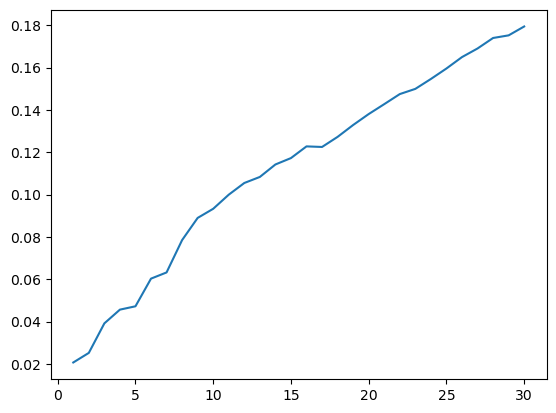

In [62]:
import matplotlib.pyplot as plt
plt.plot(range(1,31), error)

In [63]:
model = LinearRegression()

In [64]:
model_train = model.fit(X_train,y_train)

In [65]:
pred1 = model_train.predict(X_test)
pred1

array([5587.1529451 , 5290.24189918, 5103.06343476, ..., 4876.31832144,
       5530.84599291, 5241.71761036])

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

Mean Absolute Error: 748.9674453137909
Mean Squared Error: 2022653.1561600186
Root Mean Squared Error: 1422.200111151739


In [67]:
r2_accuracy = r2_score(y_test, pred1)
print("The strength of the model is ",round(r2_accuracy, 2))

The strength of the model is  0.69


## Ridge

In [68]:
ridge = Ridge()

In [69]:
ridge.fit(X_train,y_train)

Ridge()

In [70]:
X_pred_ridge_test = ridge.predict(X_test)
X_pred_ridge_test

array([5589.55427724, 5283.79429248, 5136.69746592, ..., 4871.08785492,
       5501.24422712, 5238.15663974])

In [71]:
print("The ridge test accuracy is  - ")
r2_score(y_test,X_pred_ridge_test)

The ridge test accuracy is  - 


0.6863263898823014

## Lasso

In [72]:
lasso = Lasso()

In [73]:
lasso.fit(X_train,y_train)

Lasso()

In [74]:
X_pred_lasso_test = lasso.predict(X_test)
X_pred_lasso_test

array([5591.71294442, 5139.94937515, 5323.47630222, ..., 4845.09354885,
       5182.13546077, 5215.56775531])

In [75]:
print("The lasso test accuracy is  - ")
r2_score(y_test,X_pred_lasso_test)

The lasso test accuracy is  - 


0.6821841911607098

## Polynomial Regression

In [76]:
degree = 2  # You can adjust this based on the complexity you need

# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
model_train1 = model.fit(X_train, y_train)

In [77]:
pred2 = model_train1.predict(X_test)
pred2

array([5394.78960752, 4252.13960695, 6315.8104409 , ..., 4054.8160578 ,
       5238.90378535, 4856.61327147])

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

Mean Absolute Error: 413.6592046450516
Mean Squared Error: 1303702.1635391286
Root Mean Squared Error: 1141.7977769899223


In [79]:
r2_accuracy = r2_score(y_test, pred2)
print("The strength of the model is ",round(r2_accuracy, 2))

The strength of the model is  0.8


## Saving the model

In [ ]:
filename = 'KNeighborsRegressor_model.sav'
joblib.dump(clf_train,filename)

In [ ]:
## Saving the KNeighborsRegressor Model, as it gave the highest accuracy rate of 98%